# 손글씨 분류 - load_digits

## 데이터 분석

In [8]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

In [9]:
digits = load_digits()
digits.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])

In [10]:
# feature data
digits_data = digits.data
print(digits_data.shape)
digits_data[0]

(1797, 64)


array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

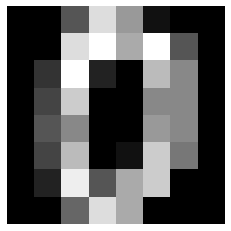

In [11]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.imshow(digits_data[0].reshape(8, 8), cmap='gray')
plt.axis('off')
plt.show()

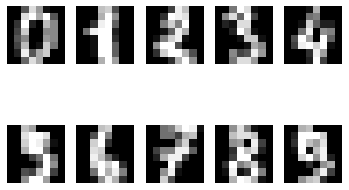

In [12]:
for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(digits.data[i].reshape(8, 8), cmap='gray')
    plt.axis('off')
plt.show()

In [13]:
# target data
digits_label = digits.target
print(digits_label.shape)
print(digits_label[:20])


(1797,)
[0 1 2 3 4 5 6 7 8 9 0 1 2 3 4 5 6 7 8 9]


In [14]:
df_digits = load_digits(as_frame=True)
df_digits.target.value_counts(sort=False)

# balanced한 데이터임을 확인

0    178
1    182
2    177
3    183
4    181
5    182
6    181
7    179
8    174
9    180
Name: target, dtype: int64

In [15]:
# dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])

digits.feature_names

['pixel_0_0',
 'pixel_0_1',
 'pixel_0_2',
 'pixel_0_3',
 'pixel_0_4',
 'pixel_0_5',
 'pixel_0_6',
 'pixel_0_7',
 'pixel_1_0',
 'pixel_1_1',
 'pixel_1_2',
 'pixel_1_3',
 'pixel_1_4',
 'pixel_1_5',
 'pixel_1_6',
 'pixel_1_7',
 'pixel_2_0',
 'pixel_2_1',
 'pixel_2_2',
 'pixel_2_3',
 'pixel_2_4',
 'pixel_2_5',
 'pixel_2_6',
 'pixel_2_7',
 'pixel_3_0',
 'pixel_3_1',
 'pixel_3_2',
 'pixel_3_3',
 'pixel_3_4',
 'pixel_3_5',
 'pixel_3_6',
 'pixel_3_7',
 'pixel_4_0',
 'pixel_4_1',
 'pixel_4_2',
 'pixel_4_3',
 'pixel_4_4',
 'pixel_4_5',
 'pixel_4_6',
 'pixel_4_7',
 'pixel_5_0',
 'pixel_5_1',
 'pixel_5_2',
 'pixel_5_3',
 'pixel_5_4',
 'pixel_5_5',
 'pixel_5_6',
 'pixel_5_7',
 'pixel_6_0',
 'pixel_6_1',
 'pixel_6_2',
 'pixel_6_3',
 'pixel_6_4',
 'pixel_6_5',
 'pixel_6_6',
 'pixel_6_7',
 'pixel_7_0',
 'pixel_7_1',
 'pixel_7_2',
 'pixel_7_3',
 'pixel_7_4',
 'pixel_7_5',
 'pixel_7_6',
 'pixel_7_7']

In [16]:
digits.target_names

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [17]:
digits.images

array([[[ 0.,  0.,  5., ...,  1.,  0.,  0.],
        [ 0.,  0., 13., ..., 15.,  5.,  0.],
        [ 0.,  3., 15., ..., 11.,  8.,  0.],
        ...,
        [ 0.,  4., 11., ..., 12.,  7.,  0.],
        [ 0.,  2., 14., ..., 12.,  0.,  0.],
        [ 0.,  0.,  6., ...,  0.,  0.,  0.]],

       [[ 0.,  0.,  0., ...,  5.,  0.,  0.],
        [ 0.,  0.,  0., ...,  9.,  0.,  0.],
        [ 0.,  0.,  3., ...,  6.,  0.,  0.],
        ...,
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  0., ..., 10.,  0.,  0.]],

       [[ 0.,  0.,  0., ..., 12.,  0.,  0.],
        [ 0.,  0.,  3., ..., 14.,  0.,  0.],
        [ 0.,  0.,  8., ..., 16.,  0.,  0.],
        ...,
        [ 0.,  9., 16., ...,  0.,  0.,  0.],
        [ 0.,  3., 13., ..., 11.,  5.,  0.],
        [ 0.,  0.,  0., ..., 16.,  9.,  0.]],

       ...,

       [[ 0.,  0.,  1., ...,  1.,  0.,  0.],
        [ 0.,  0., 13., ...,  2.,  1.,  0.],
        [ 0.,  0., 16., ..., 16.,  5.,  0.

In [43]:
print(digits.DESCR)

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 1797
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each blo

## 1. Decision Tree

In [19]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report


decision_tree = DecisionTreeClassifier()

X_train, X_test, y_train, y_test = train_test_split(digits_data,
                                                    digits_label,
                                                    test_size=0.2,
                                                    random_state=42)

decision_tree.fit(X_train, y_train)
y_pred = decision_tree.predict(X_test)
print(confusion_matrix(y_test, y_pred))


[[29  0  1  0  2  1  0  0  0  0]
 [ 0 22  1  0  2  0  0  1  1  1]
 [ 0  0 26  3  0  1  1  1  1  0]
 [ 0  0  0 31  1  0  0  0  1  1]
 [ 0  0  2  0 41  0  1  2  0  0]
 [ 0  0  1  1  1 43  1  0  0  0]
 [ 0  0  0  0  2  1 32  0  0  0]
 [ 0  0  1  1  2  0  0 30  0  0]
 [ 0  3  0  1  1  1  0  0 22  2]
 [ 0  1  0  2  3  0  0  2  0 32]]


In [20]:
print(accuracy_score(y_test, y_pred))

0.8555555555555555


In [21]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.88      0.94        33
           1       0.85      0.79      0.81        28
           2       0.81      0.79      0.80        33
           3       0.79      0.91      0.85        34
           4       0.75      0.89      0.81        46
           5       0.91      0.91      0.91        47
           6       0.91      0.91      0.91        35
           7       0.83      0.88      0.86        34
           8       0.88      0.73      0.80        30
           9       0.89      0.80      0.84        40

    accuracy                           0.86       360
   macro avg       0.86      0.85      0.85       360
weighted avg       0.86      0.86      0.86       360



load_digits의 label 데이터 분포가 balanced하며, False Negative 혹은 False Positive 둘 중 하나에 예민하게 볼 주제의 데이터가 아니다.   
때문에 **`accuracy`나 `F1-score`로 평가해도 문제는 없다.**  
실제로 `accuracy`와 `F1-score` 모두 0.86이 나왔으며, 숫자 3과 8에서 다른 숫자들에 비해 오답을 낸 경우가 살짝 보인다.

## 2. Random Forest

In [22]:
from sklearn.ensemble import RandomForestClassifier

random_forest = RandomForestClassifier()
random_forest.fit(X_train, y_train)
y_pred = random_forest.predict(X_test)
print(confusion_matrix(y_test, y_pred))

[[32  0  0  0  1  0  0  0  0  0]
 [ 0 28  0  0  0  0  0  0  0  0]
 [ 0  0 33  0  0  0  0  0  0  0]
 [ 0  0  0 33  0  1  0  0  0  0]
 [ 0  0  0  0 46  0  0  0  0  0]
 [ 0  0  0  0  0 46  1  0  0  0]
 [ 0  0  0  0  0  1 34  0  0  0]
 [ 0  0  0  0  0  0  0 33  0  1]
 [ 0  1  0  0  0  1  0  0 28  0]
 [ 0  0  0  0  0  1  0  1  0 38]]


In [23]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.97      0.98        33
           1       0.97      1.00      0.98        28
           2       1.00      1.00      1.00        33
           3       1.00      0.97      0.99        34
           4       0.98      1.00      0.99        46
           5       0.92      0.98      0.95        47
           6       0.97      0.97      0.97        35
           7       0.97      0.97      0.97        34
           8       1.00      0.93      0.97        30
           9       0.97      0.95      0.96        40

    accuracy                           0.97       360
   macro avg       0.98      0.97      0.98       360
weighted avg       0.98      0.97      0.98       360



`accuracy`와 `F1-score` 모두 0.97, 0.98이 나왔으며, 전반적으로 높은 정확도를 보여준다. 

## 3. SVM

In [25]:
from sklearn.svm import SVC

svm = SVC()
svm.fit(X_train, y_train)
y_pred = svm.predict(X_test)
print(confusion_matrix(y_test, y_pred))

[[33  0  0  0  0  0  0  0  0  0]
 [ 0 28  0  0  0  0  0  0  0  0]
 [ 0  0 33  0  0  0  0  0  0  0]
 [ 0  0  0 34  0  0  0  0  0  0]
 [ 0  0  0  0 46  0  0  0  0  0]
 [ 0  0  0  0  0 46  1  0  0  0]
 [ 0  0  0  0  0  0 35  0  0  0]
 [ 0  0  0  0  0  0  0 33  0  1]
 [ 0  0  0  0  0  0  0  0 29  1]
 [ 0  0  0  0  0  1  0  1  0 38]]


In [26]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        33
           1       1.00      1.00      1.00        28
           2       1.00      1.00      1.00        33
           3       1.00      1.00      1.00        34
           4       1.00      1.00      1.00        46
           5       0.98      0.98      0.98        47
           6       0.97      1.00      0.99        35
           7       0.97      0.97      0.97        34
           8       1.00      0.97      0.98        30
           9       0.95      0.95      0.95        40

    accuracy                           0.99       360
   macro avg       0.99      0.99      0.99       360
weighted avg       0.99      0.99      0.99       360



`accuracy`와 `F1-score`모두 0.99의 아주 높은 정확도를 보여준다

## 4. SGD Classifier

In [28]:
from sklearn.linear_model import SGDClassifier

sgd = SGDClassifier()
sgd.fit(X_train, y_train)
y_pred = sgd.predict(X_test)
print(confusion_matrix(y_test, y_pred))

[[33  0  0  0  0  0  0  0  0  0]
 [ 0 26  0  0  0  0  0  0  2  0]
 [ 0  0 33  0  0  0  0  0  0  0]
 [ 0  0  0 32  0  1  0  0  1  0]
 [ 0  0  0  0 45  0  1  0  0  0]
 [ 0  0  1  0  0 45  0  0  1  0]
 [ 0  0  0  0  0  1 34  0  0  0]
 [ 0  0  0  0  0  0  0 33  1  0]
 [ 0  0  0  0  0  1  0  0 29  0]
 [ 0  0  0  0  0  0  0  0  7 33]]


In [29]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        33
           1       1.00      0.93      0.96        28
           2       0.97      1.00      0.99        33
           3       1.00      0.94      0.97        34
           4       1.00      0.98      0.99        46
           5       0.94      0.96      0.95        47
           6       0.97      0.97      0.97        35
           7       1.00      0.97      0.99        34
           8       0.71      0.97      0.82        30
           9       1.00      0.82      0.90        40

    accuracy                           0.95       360
   macro avg       0.96      0.95      0.95       360
weighted avg       0.96      0.95      0.95       360



0.95의 정확도로 SVM보다는 조금 낮다

## 5. Logistic Regression

In [30]:
from sklearn.linear_model import LogisticRegression

logistic_regression = LogisticRegression()
logistic_regression.fit(X_train, y_train)
y_pred = logistic_regression.predict(X_test)
print(confusion_matrix(y_test, y_pred))

[[33  0  0  0  0  0  0  0  0  0]
 [ 0 28  0  0  0  0  0  0  0  0]
 [ 0  0 33  0  0  0  0  0  0  0]
 [ 0  0  0 33  0  1  0  0  0  0]
 [ 0  1  0  0 44  0  1  0  0  0]
 [ 0  0  1  0  0 44  1  0  0  1]
 [ 0  0  0  0  0  1 34  0  0  0]
 [ 0  0  0  0  0  1  0 33  0  0]
 [ 0  0  0  0  0  1  0  0 29  0]
 [ 0  0  0  1  0  0  0  0  1 38]]


C:\Users\Chromis\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [31]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        33
           1       0.97      1.00      0.98        28
           2       0.97      1.00      0.99        33
           3       0.97      0.97      0.97        34
           4       1.00      0.96      0.98        46
           5       0.92      0.94      0.93        47
           6       0.94      0.97      0.96        35
           7       1.00      0.97      0.99        34
           8       0.97      0.97      0.97        30
           9       0.97      0.95      0.96        40

    accuracy                           0.97       360
   macro avg       0.97      0.97      0.97       360
weighted avg       0.97      0.97      0.97       360



Logistic Regresssion은 0.97의 정확도를 보여줬다.
   
지금까지 5가지의 Classification 알고리즘을 비교해본다면   
load_digits 데이터의 손글씨 분류 성능으로는 **accuracy, F1-score 모두 0.99였던 `SVM`이 가장 성능이 좋았다.**

# 와인 분류 - load_wine

In [32]:
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

In [34]:
wines = load_wine()
wines.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names'])

In [42]:
wines.data[0]

array([1.423e+01, 1.710e+00, 2.430e+00, 1.560e+01, 1.270e+02, 2.800e+00,
       3.060e+00, 2.800e-01, 2.290e+00, 5.640e+00, 1.040e+00, 3.920e+00,
       1.065e+03])

In [35]:
wines.feature_names

['alcohol',
 'malic_acid',
 'ash',
 'alcalinity_of_ash',
 'magnesium',
 'total_phenols',
 'flavanoids',
 'nonflavanoid_phenols',
 'proanthocyanins',
 'color_intensity',
 'hue',
 'od280/od315_of_diluted_wines',
 'proline']

In [40]:
list(wines.target_names)

['class_0', 'class_1', 'class_2']

In [41]:
print(wines.DESCR)

.. _wine_dataset:

Wine recognition dataset
------------------------

**Data Set Characteristics:**

    :Number of Instances: 178 (50 in each of three classes)
    :Number of Attributes: 13 numeric, predictive attributes and the class
    :Attribute Information:
 		- Alcohol
 		- Malic acid
 		- Ash
		- Alcalinity of ash  
 		- Magnesium
		- Total phenols
 		- Flavanoids
 		- Nonflavanoid phenols
 		- Proanthocyanins
		- Color intensity
 		- Hue
 		- OD280/OD315 of diluted wines
 		- Proline

    - class:
            - class_0
            - class_1
            - class_2
		
    :Summary Statistics:
    
    ============================= ==== ===== ======= =====
                                   Min   Max   Mean     SD
    ============================= ==== ===== ======= =====
    Alcohol:                      11.0  14.8    13.0   0.8
    Malic Acid:                   0.74  5.80    2.34  1.12
    Ash:                          1.36  3.23    2.36  0.27
    Alcalinity of Ash:            1

In [44]:
import pandas as pd

df.wines = pd.DataFrame(wines.data, columns = wines.feature_names)
df.wines['target'] = wines.target
print(df.wines.head())

NameError: name 'columns' is not defined